1.Download The Dataser

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.Image Augmentation


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 6 classes.


In [ ]:
#load your images data

x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/flowers",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 4317 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'.tmp.driveupload': 0,
 'daisy': 1,
 'dandelion': 2,
 'rose': 3,
 'sunflower': 4,
 'tulip': 5}

3.Create a Model

In [ ]:
#initialize the model
model=Sequential()

4.Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden,layers)output)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


In [ ]:
#add convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [ ]:
#add max pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
#hidden layers
model.add(Dense(units=300,kernel_initializer="random_uniform",activation="relu"))
model.add(Dense(units=200,kernel_initializer="random_uniform",activation="relu"))
#output layer
model.add(Dense(units=4,kernel_initializer="random_uniform",activation="softmax"))

5.Compile the model

In [ ]:
#compile the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

6.Fit the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=39,epochs=25,validation_data=x_test,validation_steps=10)

7.Save the model

In [ ]:
model.save('flowers.h5')

8.Test the model

In [ ]:
#CNN prediction
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np

In [ ]:
model = load_model('/content/flowers.h5')
img = image.load_img('/content/drive/MyDrive/flowers/sunflower/1022552002_2b93faf9e7_n.jpg',target_size=(64,64))

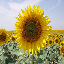

In [ ]:
img

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
x=image.img_to_array(img)

In [ ]:
x

array([[[197., 207., 234.],
        [191., 202., 230.],
        [194., 206., 232.],
        ...,
        [165., 182., 212.],
        [159., 182., 216.],
        [154., 174., 207.]],

       [[197., 205., 228.],
        [200., 206., 232.],
        [203., 211., 234.],
        ...,
        [159., 179., 212.],
        [160., 177., 207.],
        [168., 185., 215.]],

       [[206., 212., 234.],
        [205., 211., 233.],
        [207., 214., 233.],
        ...,
        [181., 190., 221.],
        [164., 180., 214.],
        [161., 180., 213.]],

       ...,

       [[ 89.,  96.,  65.],
        [131., 134., 103.],
        [124., 139., 110.],
        ...,
        [127., 147., 110.],
        [154., 170., 134.],
        [163., 178., 149.]],

       [[112., 123.,  91.],
        [152., 155., 128.],
        [ 98.,  99.,  67.],
        ...,
        [126., 143., 111.],
        [151., 164., 136.],
        [143., 156., 128.]],

       [[114., 140., 105.],
        [ 60.,  85.,  53.],
        [132., 1

In [ ]:
x.shape

(64, 64, 3)

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
pred_prob=model.predict(x)

1/1 [==============================] - 0s 414ms/step


In [ ]:
pred_prob

array([[0.24981086, 0.25015256, 0.25019586, 0.24984068]], dtype=float32)

In [ ]:
class_name=['daisy','dandelion','sunflower','rose']

In [ ]:
pred_id=pred_prob.argmax(axis=1)[0]

In [ ]:
pred_id

2

In [ ]:
print('Predicted flower is',str(class_name[pred_id]))

Predicted flower is sunflower
